### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import bamboolib as bam
import missingno as msno

### Load the Loan Data

In [2]:
loan_data = pd.read_csv(r'C:\Users\jjsun\OneDrive\Desktop\pythonprojects\LendingClub-Loan_Default-Prediction\data\raw\Loan_status_2007-2020Q3.gzip')

In [3]:
# print([column for column in df_scan.columns])
# features = [feature for feature in df_scan.columns if feature not in ['Unnamed: 0', 'id']]
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925493 entries, 0 to 2925492
Columns: 142 entries, Unnamed: 0 to debt_settlement_flag
dtypes: float64(106), int64(1), object(35)
memory usage: 3.1+ GB


Loading in the loan data shows that we have almost three million observations and 142 features. Thirty-five of the columns are categorical (object type) and 107 columns are numerical (float64 and int 64).

In [4]:
print(loan_data.head(5))

   Unnamed: 0       id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0           0  1077501     5000.0       5000.0           4975.0   36 months   
1           1  1077430     2500.0       2500.0           2500.0   60 months   
2           2  1077175     2400.0       2400.0           2400.0   36 months   
3           3  1076863    10000.0      10000.0          10000.0   36 months   
4           4  1075358     3000.0       3000.0           3000.0   60 months   

  int_rate  installment grade sub_grade  ... hardship_start_date  \
0   10.65%       162.87     B        B2  ...                 NaN   
1   15.27%        59.83     C        C4  ...                 NaN   
2   15.96%        84.33     C        C5  ...                 NaN   
3   13.49%       339.31     C        C1  ...                 NaN   
4   12.69%        67.79     B        B5  ...                 NaN   

  hardship_end_date payment_plan_start_date  hardship_length hardship_dpd  \
0               NaN                    

In [5]:
print(loan_data.describe())

         Unnamed: 0     loan_amnt   funded_amnt  funded_amnt_inv  \
count  2.925493e+06  2.925492e+06  2.925492e+06     2.925492e+06   
mean   8.697419e+04  1.535878e+04  1.535470e+04     1.534005e+04   
std    8.048842e+04  9.478383e+03  9.477145e+03     9.480634e+03   
min    0.000000e+00  5.000000e+02  5.000000e+02     0.000000e+00   
25%    3.284100e+04  8.000000e+03  8.000000e+03     8.000000e+03   
50%    6.892500e+04  1.300000e+04  1.300000e+04     1.300000e+04   
75%    1.072940e+05  2.000000e+04  2.000000e+04     2.000000e+04   
max    4.210940e+05  4.000000e+04  4.000000e+04     4.000000e+04   

        installment    annual_inc           dti   delinq_2yrs  fico_range_low  \
count  2.925492e+06  2.925488e+06  2.922384e+06  2.925463e+06    2.925492e+06   
mean   4.523914e+02  7.993727e+04  1.929648e+01  2.897012e-01    7.005110e+02   
std    2.729478e+02  1.117476e+05  1.571977e+01  8.436819e-01    3.376565e+01   
min    4.930000e+00  0.000000e+00 -1.000000e+00  0.000000e+00  

### Missing Values

In [6]:
missing = pd.concat([loan_data.isnull().sum().sort_values(ascending = False), 100 * loan_data.isnull().mean().sort_values(ascending = False)], axis=1)
missing.columns=['count', '%']
print(missing)

                        count          %
hardship_loan_status  2782082  95.097886
hardship_reason       2781861  95.090332
hardship_status       2781858  95.090229
hardship_dpd          2781856  95.090161
hardship_type         2781855  95.090127
...                       ...        ...
last_fico_range_low         1   0.000034
policy_code                 1   0.000034
funded_amnt                 1   0.000034
id                          0   0.000000
Unnamed: 0                  0   0.000000

[142 rows x 2 columns]


<AxesSubplot:>

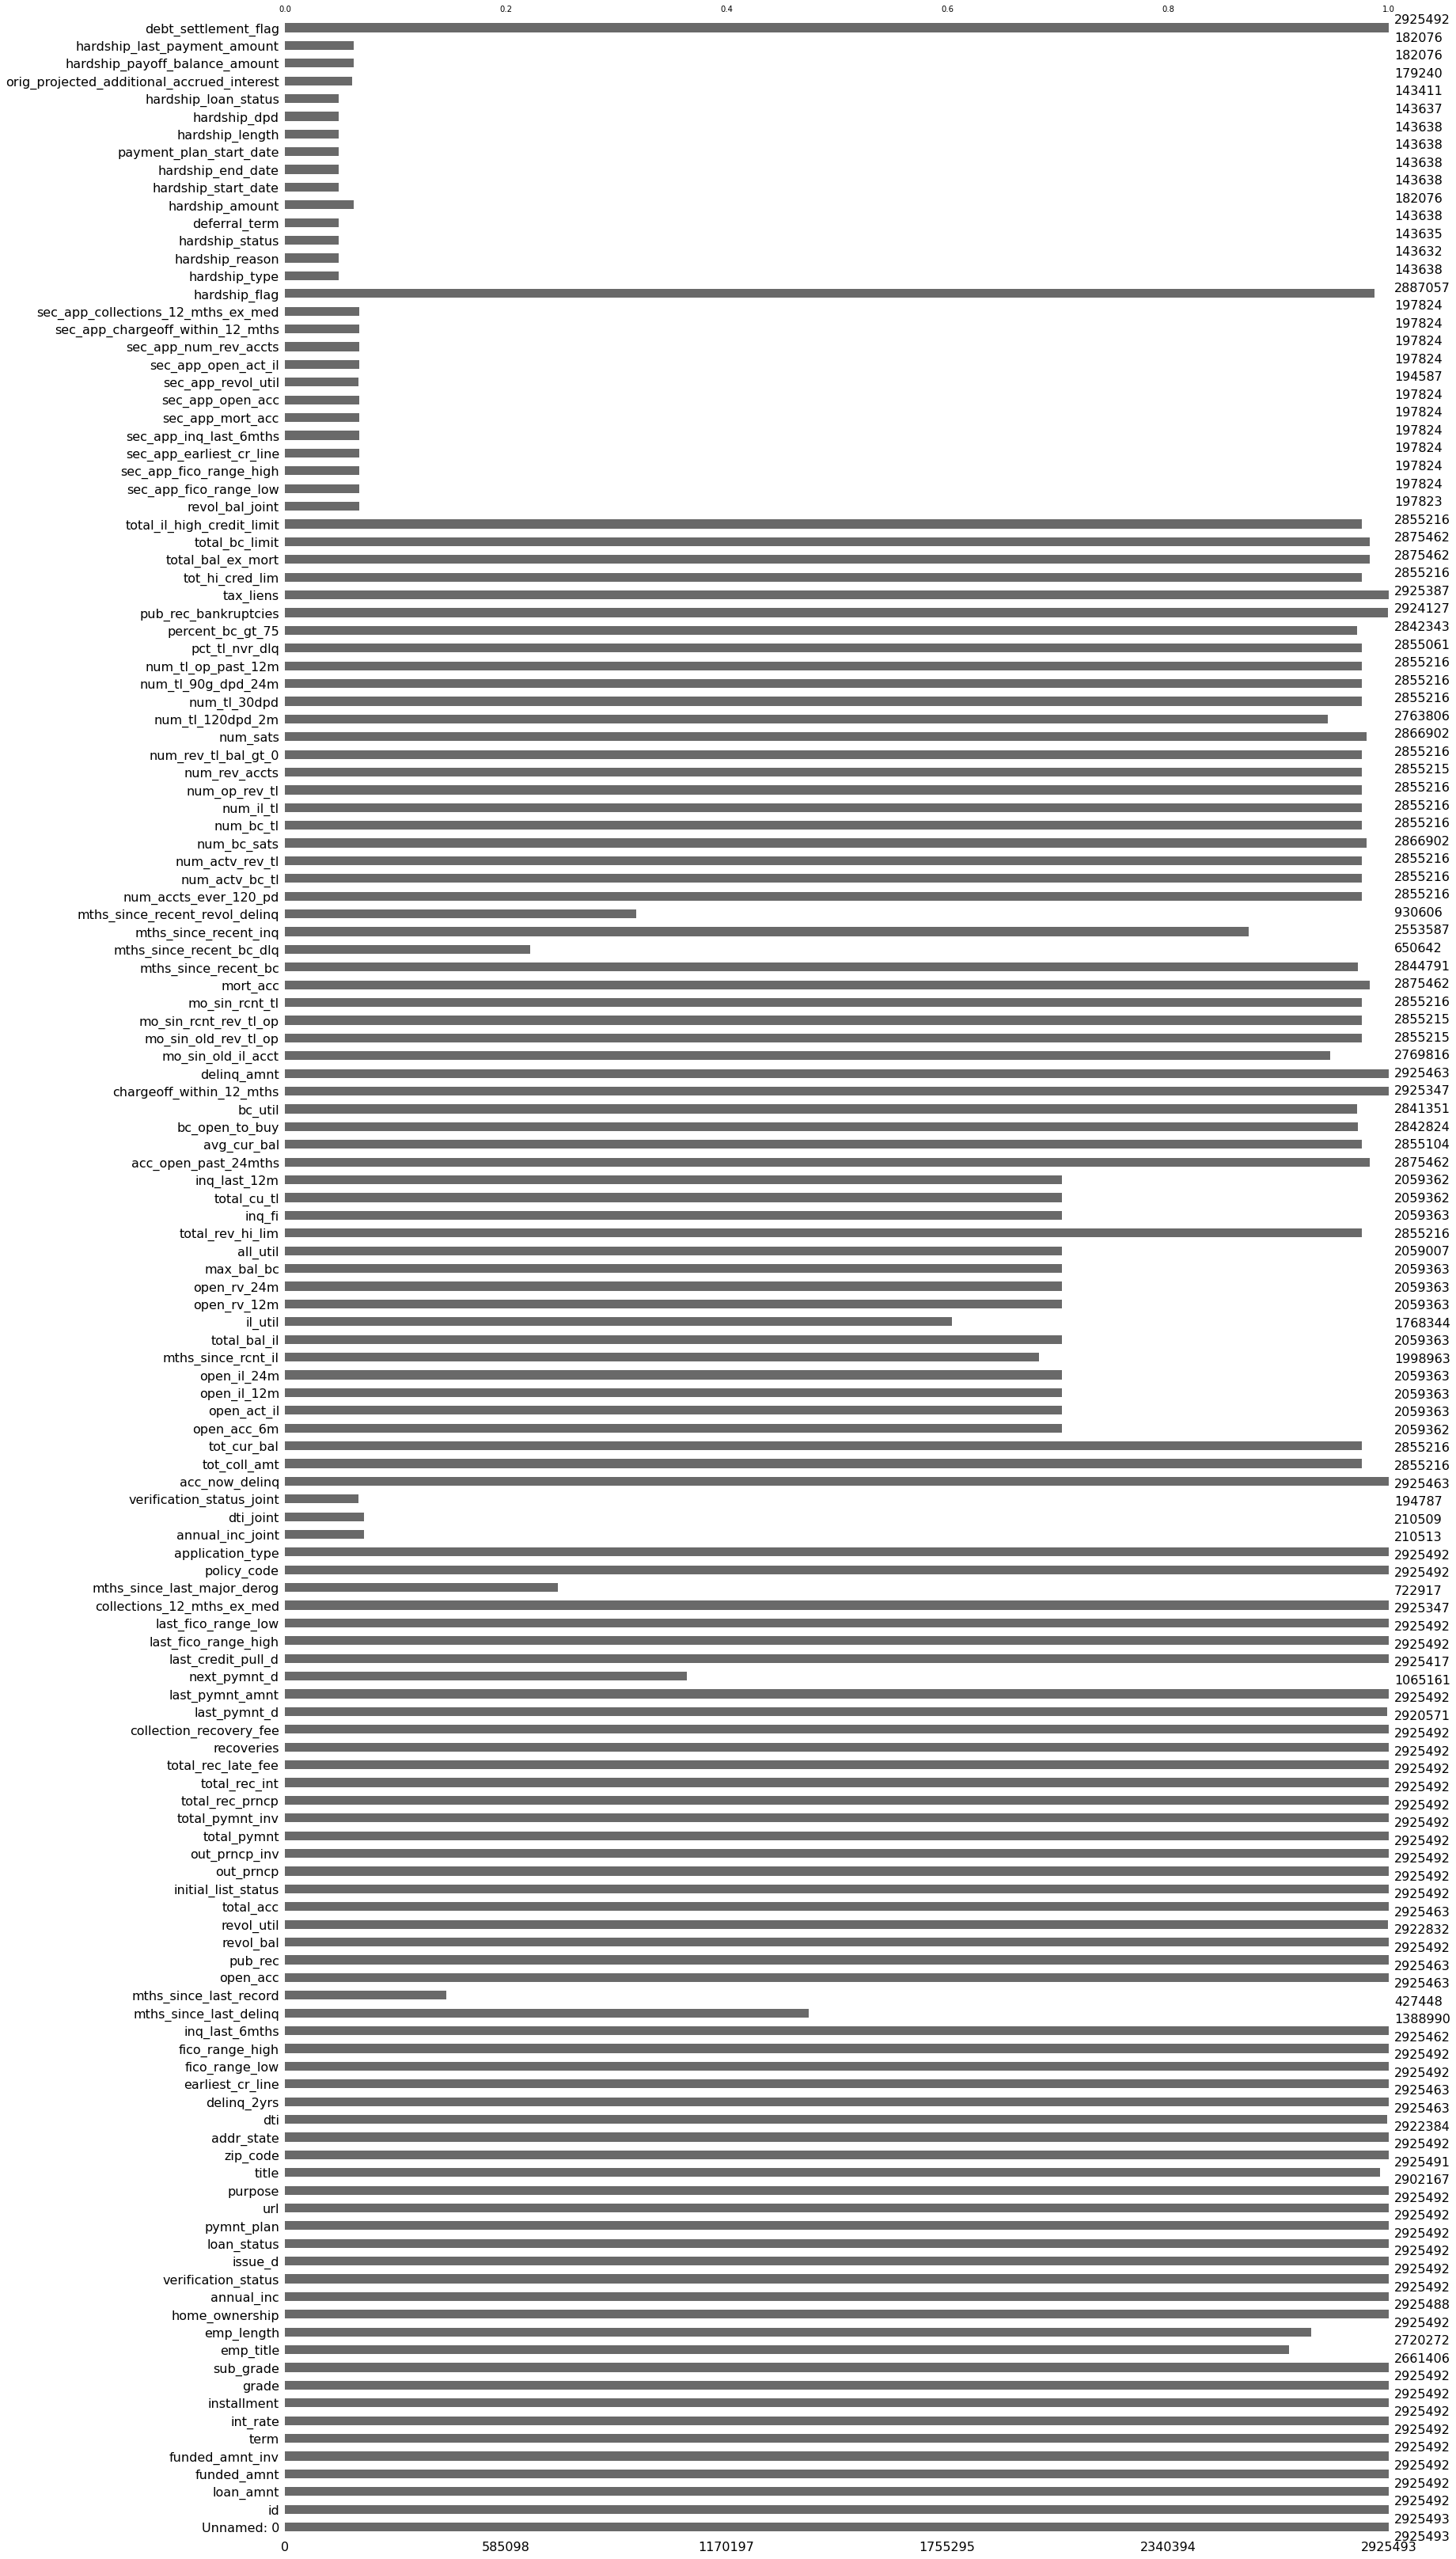

In [7]:
msno.bar(loan_data)

### Categorical Features

In [8]:
print(loan_data.select_dtypes('object').head())

        id        term int_rate grade sub_grade                 emp_title  \
0  1077501   36 months   10.65%     B        B2                       NaN   
1  1077430   60 months   15.27%     C        C4                     Ryder   
2  1077175   36 months   15.96%     C        C5                       NaN   
3  1076863   36 months   13.49%     C        C1       AIR RESOURCES BOARD   
4  1075358   60 months   12.69%     B        B5  University Medical Group   

  emp_length home_ownership verification_status   issue_d  ...  \
0  10+ years           RENT            Verified  Dec-2011  ...   
1   < 1 year           RENT     Source Verified  Dec-2011  ...   
2  10+ years           RENT        Not Verified  Dec-2011  ...   
3  10+ years           RENT     Source Verified  Dec-2011  ...   
4     1 year           RENT     Source Verified  Dec-2011  ...   

  sec_app_earliest_cr_line hardship_flag hardship_type hardship_reason  \
0                      NaN             N           NaN            

In [9]:
loan_data.select_dtypes('object').columns

Index(['id', 'term', 'int_rate', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'purpose', 'title', 'zip_code',
       'addr_state', 'earliest_cr_line', 'revol_util', 'initial_list_status',
       'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d',
       'application_type', 'verification_status_joint',
       'sec_app_earliest_cr_line', 'hardship_flag', 'hardship_type',
       'hardship_reason', 'hardship_status', 'hardship_start_date',
       'hardship_end_date', 'payment_plan_start_date', 'hardship_loan_status',
       'debt_settlement_flag'],
      dtype='object')

### Loan Terms
The loan duration ('term' feature) is a str object. It would be better to have this as a numeric feature, so let's change that.

In [10]:
# Find null entries for loan term
print(loan_data[loan_data.term.isnull()])
# Drop useless row for loans that do not meet the credit policy
loan_data.drop(loan_data[loan_data.term.isnull()].index, inplace = True)
# Extract the loan term length and convert to int64
loan_data['term'] = loan_data['term'].str[1:3].astype('int64')

       Unnamed: 0                                        id  loan_amnt  \
39786       39786  Loans that do not meet the credit policy        NaN   

       funded_amnt  funded_amnt_inv term int_rate  installment grade  \
39786          NaN              NaN  NaN      NaN          NaN   NaN   

      sub_grade  ... hardship_start_date hardship_end_date  \
39786       NaN  ...                 NaN               NaN   

      payment_plan_start_date  hardship_length hardship_dpd  \
39786                     NaN              NaN          NaN   

      hardship_loan_status orig_projected_additional_accrued_interest  \
39786                  NaN                                        NaN   

      hardship_payoff_balance_amount hardship_last_payment_amount  \
39786                            NaN                          NaN   

      debt_settlement_flag  
39786                  NaN  

[1 rows x 142 columns]


In [11]:
# Confirm that there are no more null loan term observations
print(loan_data[loan_data.term.isnull()].index)
# Rename the column to specify the units
loan_data.rename(columns={'term':'term (months)'})

Int64Index([], dtype='int64')


,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term (months),int_rate,installment,grade,sub_grade,...,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
0,0,1077501,5000.0,5000.0,4975.0,36,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,1,1077430,2500.0,2500.0,2500.0,60,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2,2,1077175,2400.0,2400.0,2400.0,36,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
3,3,1076863,10000.0,10000.0,10000.0,36,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
4,4,1075358,3000.0,3000.0,3000.0,60,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925488,105446,102556443,24000.0,24000.0,24000.0,60,23.99%,690.30,E,E2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2925489,105447,102653304,10000.0,10000.0,10000.0,36,7.99%,313.32,A,A5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2925490,105448,102628603,10050.0,10050.0,10050.0,36,16.99%,358.26,D,D1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2925491,105449,102196576,6000.0,6000.0,6000.0,36,11.44%,197.69,B,B4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N


### Interest Rate
The interest rate is also string data that should be converted into numeric float data.

In [12]:
# Find null entries for loan term
print(loan_data[loan_data.int_rate.isnull()])
# There are no null observations for interest rate
# Extract the loan term length and convert to int64
loan_data['int_rate'] = loan_data['int_rate'].str.strip('%').astype('float')/100
loan_data['revol_util'] = loan_data['revol_util'].str.strip('%').astype('float')/100

Empty DataFrame
Columns: [Unnamed: 0, id, loan_amnt, funded_amnt, funded_amnt_inv, term, int_rate, installment, grade, sub_grade, emp_title, emp_length, home_ownership, annual_inc, verification_status, issue_d, loan_status, pymnt_plan, url, purpose, title, zip_code, addr_state, dti, delinq_2yrs, earliest_cr_line, fico_range_low, fico_range_high, inq_last_6mths, mths_since_last_delinq, mths_since_last_record, open_acc, pub_rec, revol_bal, revol_util, total_acc, initial_list_status, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, next_pymnt_d, last_credit_pull_d, last_fico_range_high, last_fico_range_low, collections_12_mths_ex_med, mths_since_last_major_derog, policy_code, application_type, annual_inc_joint, dti_joint, verification_status_joint, acc_now_delinq, tot_coll_amt, tot_cur_bal, open_acc_6m, open_act_il, open_il_12m, open_il_24m, mths_since_rcnt_il, to

In [13]:
# id feature changed to integer
# loan amount changed to integer
# funded amount changed to integer
# funded amount inv kept as float
# grade changed to category
# subgrade changed to category
# employment title missing values filled with No Employment, type changed to string
# employment length missing values filled with No Employment, type changed to category
# home ownership type changed to category
# annual income missing values filled with zero
# verification status type changed to category
# issue date changed to datetime
# loan status changed to category
# payment plan changed to category (drop this), renamed and old column dropped
# url changed to string
# purpose changed to category
# title missing values filled with No Title
# title changed to string
# zip code missing values filled with mode, changed to category
# address state changed to category
# DTI missing values filled with mode
# Deliquency 2 years missing values filled with mode, changed to integer
# Earliest credit line missing values filled with median, changed to datetime
# FICO range low and high changed to integer
# Inquiry Last 6 Months missing values filled with mode, changed to integer
# Months since last delinquency missing values filled with 999, changed to integer
# Months since last record missing values filled with 999, changed to integer
# Open account missing vlaues filled with median, changed to integer
# Public record missing values filled with median, changed to integer
# Revolving utility missing values filled with mean
# Total accounts missing values filled with median, changed to integer
# Initial list status changed to category
# Last payment date missing values filled with Jan 1999, changed to datetime
# Drop next payment date column (63% missing)
# Last credit pull date missing values (0% missing) filled with mode, changed to datetime
# Last FICO High and Low changes to interger
# Collections 12 months ex med missing values (0% missing) filled with median, changed to integer
# Months since last derogatory missing values filled with 999, changed to integer
# Application type changed to category
# Annual income joint missing values (92.8% missing) filled with 0
# DTI Joint missing values (92.8% missing) filled with 999
# Verification status joint missing values (93.4% missing) filled with Not Joint, changed to category
# Dropped rows missing Account Now Delinquent feature, feature changed to integer
# Total collateral amount missing values (2.4% missing) filled with mode
# Total current balance missing values (2.4% missing) filled with 0
# Open Account 6 Months missing values (29.6% missing) filled with 999, changed to integer
# Open Account Il missing values (29.6% missing) filled with 999, changed to integer
# Open Il 12 Months missing values (29.6% missing) filled with 999, changed to integer
# Open Il 24 Months missing values (29.6% missing) filled with 999, changed to integer
# Months Since Recent Il missing values (31.6% missing) filled with 999, changed to integer
# Total Balanace Il missing values (29.6% missing) filled with 999, changed to integer
# Il Util missing values (39.6% missing) filled with 999, changed to integer
# Open RV 12 Months missing values (29.6% missing) filled with 999, changed to integer
# Open RV 24 Months missing values (29.6% missing) filled with 999, changed to integer
# Max Balance BC missing values filled with -999, changed to integer
# All Util missing values (29.6% missing) filled with -999, changed to integer
# Total Rev Hi Limit missing values (2.4% missing) filled with median, changed to integer
# Inq Fi missing values (29.6% missing) filled with -999, changed to integer
# Total Cu Tl missing values (29.6% missing) filled with -999, changed to integer
# Inq Last 12 Months missing values (29.6% missing) filled with -999, changed to integer
# Account Open Past 24 Months missing values (1.7% missing) filled with median, changed to integer
# Average Current Balance missing values (2.4% missing) filled with 0, changed to integer
# BC Open to Buy missing values (2.8% missing) filled with -999, changed to integer
# BC Util missing values (2.8% missing) filled with -999
# Charegoff Within 12 Months missing values (0.0% missing) filled with -999, changed to integer
# Mo Sin Old Il Account missing values (5.3% missing) filled with -999, changed to integer

In [14]:
# df_scan.fico_range_high.hist()
# df_scan.purpose.value_counts()
convert_to_int = ['id']

loan_data['id'] = pd.to_numeric(loan_data['id'], downcast='integer', errors='coerce')
loan_data['loan_amnt'] = pd.to_numeric(loan_data['loan_amnt'], downcast='integer', errors='coerce')
loan_data['funded_amnt'] = pd.to_numeric(loan_data['funded_amnt'], downcast='integer', errors='coerce')
# fix funded_amnt_inv
loan_data['grade'] = loan_data['grade'].astype('category')
loan_data['sub_grade'] = loan_data['sub_grade'].astype('category')

loan_data[['emp_title']] = loan_data[['emp_title']].fillna('No Employment')
loan_data['emp_title'] = loan_data['emp_title'].astype('string')
loan_data[['emp_length']] = loan_data[['emp_length']].fillna('No Employment')
loan_data['emp_length'] = loan_data['emp_length'].astype('category')
loan_data['home_ownership'] = loan_data['home_ownership'].astype('category')
loan_data[['annual_inc']] = loan_data[['annual_inc']].fillna(0)
loan_data['verification_status'] = loan_data['verification_status'].astype('category')
loan_data['issue_d'] = pd.to_datetime(loan_data['issue_d'], infer_datetime_format=True)
loan_data['loan_status'] = loan_data['loan_status'].astype('category')
loan_data['payment_plan'] = loan_data['pymnt_plan'].astype('category')
loan_data = loan_data.drop(columns=['pymnt_plan'])
loan_data['url'] = loan_data['url'].astype('string')
loan_data['purpose'] = loan_data['purpose'].astype('category')
loan_data[['title']] = loan_data[['title']].fillna('No Title')
loan_data['title'] = loan_data['title'].astype('string')
loan_data[['zip_code']] = loan_data[['zip_code']].fillna(loan_data[['zip_code']].mode().iloc[0])
loan_data['zip_code'] = loan_data['zip_code'].astype('category')
loan_data['addr_state'] = loan_data['addr_state'].astype('category')
loan_data[['dti']] = loan_data[['dti']].fillna(loan_data[['dti']].mode().iloc[0])

for column_name in ['fico_range_low', 'fico_range_high']:
    loan_data[column_name] = loan_data[column_name].astype('int')


loan_data[['delinq_2yrs']] = loan_data[['delinq_2yrs']].fillna(loan_data[['delinq_2yrs']].mode().iloc[0])
loan_data['delinq_2yrs'] = pd.to_numeric(loan_data['delinq_2yrs'], downcast='integer', errors='coerce')
loan_data[['earliest_cr_line']] = loan_data[['earliest_cr_line']].fillna(loan_data[['earliest_cr_line']].median())
loan_data['earliest_cr_line'] = pd.to_datetime(loan_data['earliest_cr_line'], infer_datetime_format=True)
loan_data[['inq_last_6mths']] = loan_data[['inq_last_6mths']].fillna(loan_data[['inq_last_6mths']].mode().iloc[0])
loan_data['inq_last_6mths'] = pd.to_numeric(loan_data['inq_last_6mths'], downcast='integer', errors='coerce')
loan_data[['mths_since_last_delinq']] = loan_data[['mths_since_last_delinq']].fillna(999)
loan_data['mths_since_last_delinq'] = pd.to_numeric(loan_data['mths_since_last_delinq'], downcast='integer', errors='coerce')
loan_data[['mths_since_last_record']] = loan_data[['mths_since_last_record']].fillna(999)
loan_data['mths_since_last_record'] = pd.to_numeric(loan_data['mths_since_last_record'], downcast='integer', errors='coerce')
loan_data[['open_acc']] = loan_data[['open_acc']].fillna(loan_data[['open_acc']].median())
loan_data['open_acc'] = pd.to_numeric(loan_data['open_acc'], downcast='integer', errors='coerce')
loan_data[['pub_rec']] = loan_data[['pub_rec']].fillna(loan_data[['pub_rec']].mode().iloc[0])
loan_data['pub_rec'] = pd.to_numeric(loan_data['pub_rec'], downcast='integer', errors='coerce')
loan_data[['revol_util']] = loan_data[['revol_util']].fillna(loan_data[['revol_util']].mean())
loan_data[['total_acc']] = loan_data[['total_acc']].fillna(loan_data[['total_acc']].median())
loan_data['total_acc'] = pd.to_numeric(loan_data['total_acc'], downcast='integer', errors='coerce')
loan_data['initial_list_status'] = loan_data['initial_list_status'].astype('category')
loan_data[['last_pymnt_d']] = loan_data[['last_pymnt_d']].fillna('Jan-1999')
loan_data['last_pymnt_d'] = pd.to_datetime(loan_data['last_pymnt_d'], infer_datetime_format=True)
loan_data = loan_data.drop(columns=['next_pymnt_d'])
loan_data[['last_credit_pull_d']] = loan_data[['last_credit_pull_d']].fillna(loan_data[['last_credit_pull_d']].mode().iloc[0])
loan_data['last_credit_pull_d'] = pd.to_datetime(loan_data['last_credit_pull_d'], infer_datetime_format=True)
loan_data['last_fico_range_high'] = pd.to_numeric(loan_data['last_fico_range_high'], downcast='integer', errors='coerce')
loan_data['last_fico_range_low'] = pd.to_numeric(loan_data['last_fico_range_low'], downcast='integer', errors='coerce')
loan_data[['collections_12_mths_ex_med']] = loan_data[['collections_12_mths_ex_med']].fillna(loan_data[['collections_12_mths_ex_med']].median())
loan_data['collections_12_mths_ex_med'] = pd.to_numeric(loan_data['collections_12_mths_ex_med'], downcast='integer', errors='coerce')
loan_data['mths_since_last_major_derog'] = loan_data['mths_since_last_major_derog'].astype('Int64')
loan_data[['mths_since_last_major_derog']] = loan_data[['mths_since_last_major_derog']].fillna(999)
loan_data = loan_data.drop(columns=['policy_code'])
loan_data['application_type'] = loan_data['application_type'].astype('category')
loan_data[['annual_inc_joint']] = loan_data[['annual_inc_joint']].fillna(0)
loan_data[['dti_joint']] = loan_data[['dti_joint']].fillna(999)
loan_data[['verification_status_joint']] = loan_data[['verification_status_joint']].fillna('Not Joint')
loan_data['verification_status_joint'] = loan_data['verification_status_joint'].astype('category')
loan_data = loan_data.dropna(subset=['acc_now_delinq'])
loan_data['acc_now_delinq'] = pd.to_numeric(loan_data['acc_now_delinq'], downcast='integer', errors='coerce')
loan_data[['tot_coll_amt']] = loan_data[['tot_coll_amt']].fillna(loan_data[['tot_coll_amt']].mode().iloc[0])
loan_data[['tot_cur_bal']] = loan_data[['tot_cur_bal']].fillna(0)
loan_data[['open_acc_6m']] = loan_data[['open_acc_6m']].fillna(999)
loan_data['open_acc_6m'] = pd.to_numeric(loan_data['open_acc_6m'], downcast='integer', errors='coerce')
loan_data[['open_act_il']] = loan_data[['open_act_il']].fillna(999)
loan_data['open_act_il'] = pd.to_numeric(loan_data['open_act_il'], downcast='integer', errors='coerce')
loan_data[['open_il_12m']] = loan_data[['open_il_12m']].fillna(999)
loan_data['open_il_12m'] = pd.to_numeric(loan_data['open_il_12m'], downcast='integer', errors='coerce')
loan_data[['open_il_24m']] = loan_data[['open_il_24m']].fillna(999)
loan_data['open_il_24m'] = pd.to_numeric(loan_data['open_il_24m'], downcast='integer', errors='coerce')
loan_data[['mths_since_rcnt_il']] = loan_data[['mths_since_rcnt_il']].fillna(999)
loan_data['mths_since_rcnt_il'] = pd.to_numeric(loan_data['mths_since_rcnt_il'], downcast='integer', errors='coerce')
loan_data[['total_bal_il']] = loan_data[['total_bal_il']].fillna(999)
loan_data['total_bal_il'] = pd.to_numeric(loan_data['total_bal_il'], downcast='integer', errors='coerce')
loan_data[['il_util']] = loan_data[['il_util']].fillna(999)
loan_data['il_util'] = pd.to_numeric(loan_data['il_util'], downcast='integer', errors='coerce')
loan_data[['open_rv_12m']] = loan_data[['open_rv_12m']].fillna(999)
loan_data['open_rv_12m'] = pd.to_numeric(loan_data['open_rv_12m'], downcast='integer', errors='coerce')
loan_data[['open_rv_24m']] = loan_data[['open_rv_24m']].fillna(999)
loan_data['open_rv_24m'] = pd.to_numeric(loan_data['open_rv_24m'], downcast='integer', errors='coerce')
loan_data[['max_bal_bc']] = loan_data[['max_bal_bc']].fillna(-999)
loan_data['max_bal_bc'] = pd.to_numeric(loan_data['max_bal_bc'], downcast='integer', errors='coerce')
loan_data[['all_util']] = loan_data[['all_util']].fillna(-999)
loan_data['all_util'] = pd.to_numeric(loan_data['all_util'], downcast='integer', errors='coerce')
loan_data[['total_rev_hi_lim']] = loan_data[['total_rev_hi_lim']].fillna(loan_data[['total_rev_hi_lim']].median())
loan_data['total_rev_hi_lim'] = pd.to_numeric(loan_data['total_rev_hi_lim'], downcast='integer', errors='coerce')
loan_data[['inq_fi']] = loan_data[['inq_fi']].fillna(-999)
loan_data['inq_fi'] = pd.to_numeric(loan_data['inq_fi'], downcast='integer', errors='coerce')
loan_data[['total_cu_tl']] = loan_data[['total_cu_tl']].fillna(-999)
loan_data['total_cu_tl'] = pd.to_numeric(loan_data['total_cu_tl'], downcast='integer', errors='coerce')
loan_data[['inq_last_12m']] = loan_data[['inq_last_12m']].fillna(-999)
loan_data['inq_last_12m'] = pd.to_numeric(loan_data['inq_last_12m'], downcast='integer', errors='coerce')
loan_data[['acc_open_past_24mths']] = loan_data[['acc_open_past_24mths']].fillna(loan_data[['acc_open_past_24mths']].median())
loan_data['acc_open_past_24mths'] = pd.to_numeric(loan_data['acc_open_past_24mths'], downcast='integer', errors='coerce')
loan_data[['avg_cur_bal']] = loan_data[['avg_cur_bal']].fillna(0)
loan_data['avg_cur_bal'] = pd.to_numeric(loan_data['avg_cur_bal'], downcast='integer', errors='coerce')
loan_data[['bc_open_to_buy']] = loan_data[['bc_open_to_buy']].fillna(-999)
loan_data['bc_open_to_buy'] = pd.to_numeric(loan_data['bc_open_to_buy'], downcast='integer', errors='coerce')
loan_data[['mo_sin_old_il_acct']] = loan_data[['mo_sin_old_il_acct']].fillna(-999)
loan_data['mo_sin_old_il_acct'] = pd.to_numeric(loan_data['mo_sin_old_il_acct'], downcast='integer', errors='coerce')
loan_data['delinq_amnt'] = pd.to_numeric(loan_data['delinq_amnt'], downcast='integer', errors='coerce')
loan_data[['bc_util']] = loan_data[['bc_util']].fillna(-999)
loan_data['bc_util'] = pd.to_numeric(loan_data['bc_util'], downcast='integer', errors='coerce')
loan_data[['chargeoff_within_12_mths']] = loan_data[['chargeoff_within_12_mths']].fillna(-999)
loan_data['chargeoff_within_12_mths'] = pd.to_numeric(loan_data['chargeoff_within_12_mths'], downcast='integer', errors='coerce')
loan_data[['mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_revol_delinq', 'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m']] = loan_data[['mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_revol_delinq', 'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m']].fillna(-999)
loan_data['num_tl_120dpd_2m'] = pd.to_numeric(loan_data['num_tl_120dpd_2m'], downcast='integer', errors='coerce')
loan_data['num_sats'] = pd.to_numeric(loan_data['num_sats'], downcast='integer', errors='coerce')
loan_data['num_rev_tl_bal_gt_0'] = pd.to_numeric(loan_data['num_rev_tl_bal_gt_0'], downcast='integer', errors='coerce')
loan_data['num_rev_accts'] = pd.to_numeric(loan_data['num_rev_accts'], downcast='integer', errors='coerce')
loan_data['num_op_rev_tl'] = pd.to_numeric(loan_data['num_op_rev_tl'], downcast='integer', errors='coerce')
loan_data['num_il_tl'] = pd.to_numeric(loan_data['num_il_tl'], downcast='integer', errors='coerce')
loan_data['num_bc_tl'] = pd.to_numeric(loan_data['num_bc_tl'], downcast='integer', errors='coerce')
loan_data['num_bc_sats'] = pd.to_numeric(loan_data['num_bc_sats'], downcast='integer', errors='coerce')
loan_data['num_actv_rev_tl'] = pd.to_numeric(loan_data['num_actv_rev_tl'], downcast='integer', errors='coerce')
loan_data['num_actv_bc_tl'] = pd.to_numeric(loan_data['num_actv_bc_tl'], downcast='integer', errors='coerce')
loan_data['num_accts_ever_120_pd'] = pd.to_numeric(loan_data['num_accts_ever_120_pd'], downcast='integer', errors='coerce')
loan_data['mths_since_recent_revol_delinq'] = pd.to_numeric(loan_data['mths_since_recent_revol_delinq'], downcast='integer', errors='coerce')
loan_data['mo_sin_old_rev_tl_op'] = pd.to_numeric(loan_data['mo_sin_old_rev_tl_op'], downcast='integer', errors='coerce')
loan_data['mo_sin_rcnt_rev_tl_op'] = pd.to_numeric(loan_data['mo_sin_rcnt_rev_tl_op'], downcast='integer', errors='coerce')
loan_data[['mths_since_recent_bc_dlq']] = loan_data[['mths_since_recent_bc_dlq']].fillna(-999)
loan_data['mort_acc'] = pd.to_numeric(loan_data['mort_acc'], downcast='integer', errors='coerce')
loan_data[['mths_since_rcnt_il']] = loan_data[['mths_since_rcnt_il']].fillna(-999)
loan_data[['mo_sin_rcnt_tl']] = loan_data[['mo_sin_rcnt_tl']].fillna(-999)
loan_data['mo_sin_rcnt_tl'] = pd.to_numeric(loan_data['mo_sin_rcnt_tl'], downcast='integer', errors='coerce')
loan_data['mths_since_recent_bc'] = pd.to_numeric(loan_data['mths_since_recent_bc'], downcast='integer', errors='coerce')
loan_data['mths_since_recent_bc_dlq'] = pd.to_numeric(loan_data['mths_since_recent_bc_dlq'], downcast='integer', errors='coerce')
loan_data['mths_since_recent_inq'] = pd.to_numeric(loan_data['mths_since_recent_inq'], downcast='integer', errors='coerce')
loan_data

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,payment_plan
0,0,1077501,5000,5000,4975.0,36,0.1065,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,n
1,1,1077430,2500,2500,2500.0,60,0.1527,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,n
2,2,1077175,2400,2400,2400.0,36,0.1596,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,n
3,3,1076863,10000,10000,10000.0,36,0.1349,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,n
4,4,1075358,3000,3000,3000.0,60,0.1269,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925488,105446,102556443,24000,24000,24000.0,60,0.2399,690.30,E,E2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,n
2925489,105447,102653304,10000,10000,10000.0,36,0.0799,313.32,A,A5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,n
2925490,105448,102628603,10050,10050,10050.0,36,0.1699,358.26,D,D1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,n
2925491,105449,102196576,6000,6000,6000.0,36,0.1144,197.69,B,B4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,n
